In [3]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

boston = datasets.load_boston()
print(boston.DESCR)
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [112]:
boston_df['MEDV'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [113]:
corr_matrix = boston_df.corr().round(2)
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


Correlation matrices display correlation coefficients between variables. These coefficients range from -1 and 1, where 0 means there is no correlation between the variables, 1 means the variables have a perfect positive correlation, and -1 meaning the variables have a perfect negative correlation. To have a perfect positive correlation is to say that as one variable increases, the second variable will increase to the same degree, while a perfect negative correlation is to say that as one variable increases, the second variable will decrease to the same degree. Though you'll more often find correlations to be in-between these extremes, with variables only having a fraction of the effect on the other. 

Heatmaps are a great data visualization for correlation matrices as the correlation coefficients become colour coded based on the strength of the correlation between the variables.

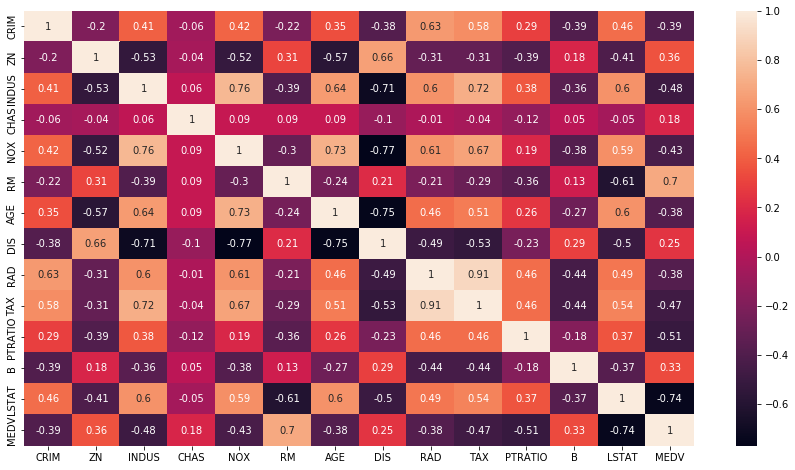

In [114]:
plt.figure(figsize = (15,8))
sns.heatmap(corr_matrix, annot = True)

I'm not going to include the variable CHAS in my multiple linear regression model as it is has a fairly neutral relationship with many of the other variables, and I do not find it a compelling variable. I will also drop MEDV from boston_df in order to properly apply the dataframe for fitting the model.

In [115]:
boston_df.drop(['CHAS','MEDV'], axis = 1, inplace = True)
boston_df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [225]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=123)

ml_model = LinearRegression()
ml_model.fit(x_train, y_train)

coefficients_df = pd.DataFrame(ml_model.coef_, x.columns, columns = ['Coefficient'])
coefficients_df.loc['Intercept'] = model.intercept_
coefficients_df

,Coefficient
CRIM,-0.101433
ZN,0.040051
INDUS,0.076605
NOX,-14.261874
RM,4.836790
AGE,-0.007253
DIS,-1.326311
RAD,0.275594
TAX,-0.013188
PTRATIO,-0.959131


In [5]:
train_test_split?

$\hat{MEDV} = 36.891960 - 0.101433(CRIM) + 0.040051(ZN) + 0.076605(INDUS) - 14.261874(NOX) + 4.836790(RM) - 0.007253(AGE) - 1.326311(DIS) + 0.275594(RAD) - 0.013188(TAX) - 0.959131(PTRATIO) + 0.006478(B) - 0.486998(LSTAT)$

This is the formula we receive from the model for our estimated median value of owner-occupied homes in \\$1000's (MEDV). We have an estimated intercept of 36.891960, which is to say that if hypothetically all the variables in the model were to equal 0 (even though that is not possible given some of these variables) we would estimate the median value of the homes to be \\$36,891.96. Also included in the formula are the coefficients of the predictors that tell us the degree of change on the dependent variable (MEDV) if we were to increase/decrease the variable by 1 unit. For example, if the per capita crime rate (CRIM) went up by 1 unit, this would, on average, decrease the median value of the homes by 0.101433 or \\$101.43. More importantly, we are now able to predict the MEDV of a home given values for each of the variables in the model. 

In [241]:
example_predictors = [[0.05, 0, 4.5, 0.36, 5, 62, 2, 3, 250, 20, 390, 6]]
example_medv_pred = model.predict(example_predictors)
example_medv_pred[0]

25.590923514283887

With the variables given we would expect the median value of the home to be $25,590.92

The model we had created before was actually based off of split data that was comprised of 70% of the original Boston dataset called the train data. Now we will use the remaining 30% of the data, called the test data, as a means of testing our model's ability to be used for predictions.

In [234]:
y_pred = ml_model.predict(x_test)

r_sqrt = ml_model.score(x,y)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mae = metrics.mean_absolute_error(y_test, y_pred)

pd.Series({'R^2': r_sqrt, 'RMSE': rmse, 'MAE': mae})

R^2     0.730703
RMSE    5.353813
MAE     3.703006
dtype: float64

R-squared is the proportion of the variance in the response variable that can be explained by the predictor variables, the higher the proportion the better. In this case, approx. 73% of the variance in MEDV can be explained by the predictors, which isn't bad, but not great. The root mean square error (RMSE) gives us the average distance between the predicted values of the dependent variable from the model and the actual values of the dependent variable in the dataset, the lower the RMSE the better the model fits the data. In our case, that average distance is 5.353813 or approx. $5353.81, which I believe has room for improvement by means of creating a better fitting model with the train data. The mean absolute error (MAE) is the average absolute (value) difference between the actual values of the dependent variable in the dataset and the predicted values of the dependent variable from the model, the lower the MAE the better the model fits the data.

I would regard these results as merely okay in making predictions. On each evaluation metric examined, there is room for improvement. It is likely under fit as the model used was linear. A method to improve these metrics would be to take more consideration to the interactions between variables given there are a few variables that have reasonably strong correlation relationships, but more broadly speaking, the model simply needs to become more flexible by integrating nonlinear variables upon fitting the model.